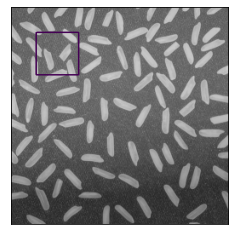

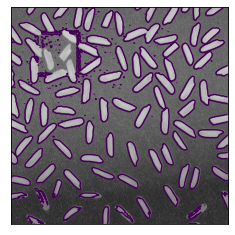

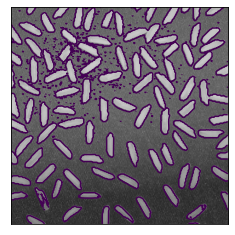

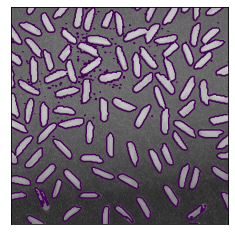

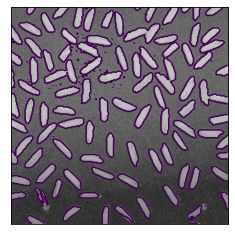

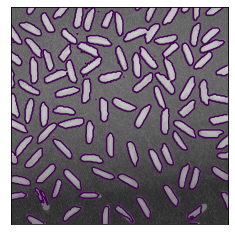

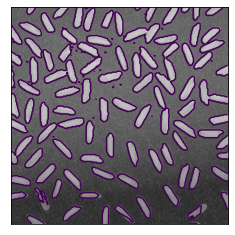

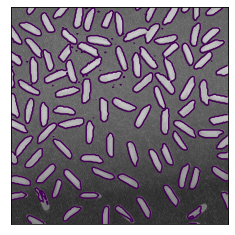

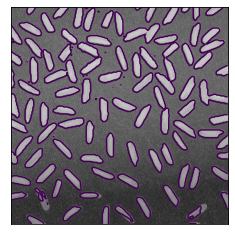

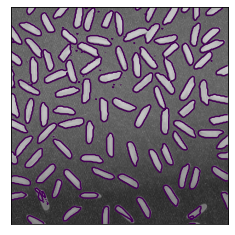

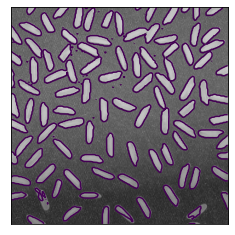

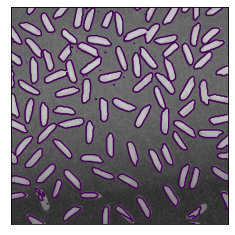

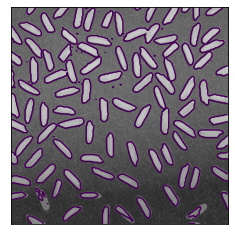

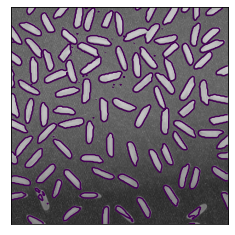

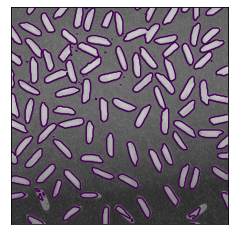

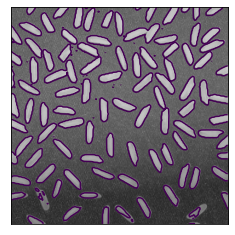

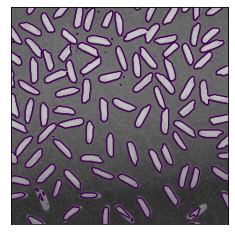

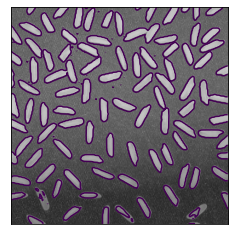

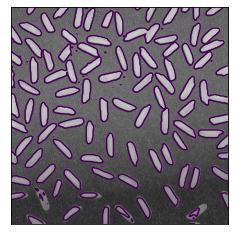

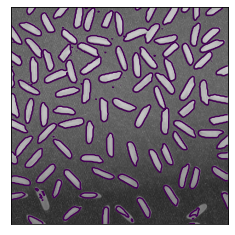

In [7]:
# -*- coding: utf-8 -*-
"""
Created on Fri Dec 18 11:29:15 2020

@author: GoodLiar
"""

#coding:utf-8
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
from pylab import*

Image = cv2.imread('rice.png',1)  #读入原图
image = cv2.cvtColor(Image,cv2.COLOR_BGR2GRAY)
img=np.array(image,dtype=np.float64) #读入到np的array中，并转化浮点类型

#初始水平集函数
IniLSF = np.ones((img.shape[0],img.shape[1]),img.dtype) 
IniLSF[30:80,30:80]= -1 
IniLSF=-IniLSF 

#画初始轮廓
Image = cv2.cvtColor(Image,cv2.COLOR_BGR2RGB) 
plt.figure(1),plt.imshow(Image),plt.xticks([]), plt.yticks([])   # to hide tick values on X and Y axis
plt.contour(IniLSF,[0])  #画LSF=0处的等高线
plt.draw(),plt.show(block=False) 

def mat_math (intput,str):
    output=intput 
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if str=="atan":
                output[i,j] = math.atan(intput[i,j]) 
            if str=="sqrt":
                output[i,j] = math.sqrt(intput[i,j]) 
    return output 

#CV函数
def CV (LSF, img, mu, nu, epison,step):

    Drc = (epison / math.pi) / (epison*epison+ LSF*LSF)
    Hea = 0.5*(1 + (2 / math.pi)*mat_math(LSF/epison,"atan")) 
    Iy, Ix = np.gradient(LSF) 
    s = mat_math(Ix*Ix+Iy*Iy,"sqrt") 
    Nx = Ix / (s+0.000001) 
    Ny = Iy / (s+0.000001) 
    Mxx,Nxx =np.gradient(Nx) 
    Nyy,Myy =np.gradient(Ny) 
    cur = Nxx + Nyy 
    Length = nu*Drc*cur 

    Lap = cv2.Laplacian(LSF,-1) 
    Penalty = mu*(Lap - cur) 

    s1=Hea*img 
    s2=(1-Hea)*img 
    s3=1-Hea 
    C1 = s1.sum()/ Hea.sum() 
    C2 = s2.sum()/ s3.sum() 
    CVterm = Drc*(-1 * (img - C1)*(img - C1) + 1 * (img - C2)*(img - C2)) 

    LSF = LSF + step*(Length + Penalty + CVterm) 
    #plt.imshow(s, cmap ='gray'),plt.show() 
    return LSF 

#模型参数
mu = 1 
nu = 0.003 * 255 * 255 
num = 20 
epison = 1 
step = 0.1 
LSF=IniLSF 
for i in range(1,num):
    LSF = CV(LSF, img, mu, nu, epison,step) #迭代
    if i % 1 == 0:    #显示分割轮廓
        plt.imshow(Image)
        plt.xticks([])
        plt.yticks([])  
        plt.contour(LSF,[0]) 
        plt.draw()
        plt.show(block=False)
        plt.pause(0.1) 




















#kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5, 5))#定义结构元素
#closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)#闭运算

#img_=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img_)
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
#plt.show()